<a href="https://colab.research.google.com/github/AndrzejOlejniczak/PORTFOLIO/blob/main/Random_Forest_Regression_with_Logan_Housing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Regression
This project is for me to understand the concept of random forest regression.

This content is based on the lecture of Prof. Pedram Jahangiry.

https://www.youtube.com/watch?v=llYimxlsMf4&list=WL&index=83&t=36s

## 1. Prepare the Environment

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os

## 2. Prepare the data

### 2.1. Load the data

In [ ]:
data_path = 'drive/MyDrive/Colab Notebooks/Logan_housing'

In [ ]:
os.listdir(data_path)

['Logan_housing.csv']

In [ ]:
logan_data = pd.read_csv(os.path.join(data_path, os.listdir(data_path)[0]))

### 2.2. Inspect the data

In [ ]:
logan_data.head()

,Sold Price,DOM,Garage Capacity,HOA Fee,Irregular Shape,Quadrant,School District,Sold Terms,Total Bedrooms,Total Bathrooms,Total Square Feet,Year Built,Zip,year_sold,month_sold,built_after_2000
0,176000,5,2,0,No,NW,Cache,FHA,3,1,1031,1974,84335,2018,9,0
1,225000,6,2,0,No,NW,Cache,Conventional,4,2,2091,1995,84335,2018,7,0
2,274900,14,2,0,No,NW,Cache,Conventional,3,1,2016,1980,84335,2018,11,0
3,175000,16,1,0,No,NW,Cache,USDA Rural Development,4,1,1920,1978,84335,2018,6,0
4,179000,29,0,0,No,NW,Cache,Cash,4,2,1329,1976,84335,2018,9,0


In [ ]:
logan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4110 entries, 0 to 4109
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sold Price         4110 non-null   int64 
 1   DOM                4110 non-null   int64 
 2   Garage Capacity    4110 non-null   int64 
 3   HOA Fee            4110 non-null   int64 
 4   Irregular Shape    4110 non-null   object
 5   Quadrant           4110 non-null   object
 6   School District    4110 non-null   object
 7   Sold Terms         4110 non-null   object
 8   Total Bedrooms     4110 non-null   int64 
 9   Total Bathrooms    4110 non-null   int64 
 10  Total Square Feet  4110 non-null   int64 
 11  Year Built         4110 non-null   int64 
 12  Zip                4110 non-null   int64 
 13  year_sold          4110 non-null   int64 
 14  month_sold         4110 non-null   int64 
 15  built_after_2000   4110 non-null   int64 
dtypes: int64(12), object(4)
memory usage: 513.

In [ ]:
logan_data.isnull().sum() / len(logan_data)

Sold Price           0.0
DOM                  0.0
Garage Capacity      0.0
HOA Fee              0.0
Irregular Shape      0.0
Quadrant             0.0
School District      0.0
Sold Terms           0.0
Total Bedrooms       0.0
Total Bathrooms      0.0
Total Square Feet    0.0
Year Built           0.0
Zip                  0.0
year_sold            0.0
month_sold           0.0
built_after_2000     0.0
dtype: float64

In [ ]:
# Drop duplicates?
logan_data.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4108 entries, 0 to 4109
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sold Price         4108 non-null   int64 
 1   DOM                4108 non-null   int64 
 2   Garage Capacity    4108 non-null   int64 
 3   HOA Fee            4108 non-null   int64 
 4   Irregular Shape    4108 non-null   object
 5   Quadrant           4108 non-null   object
 6   School District    4108 non-null   object
 7   Sold Terms         4108 non-null   object
 8   Total Bedrooms     4108 non-null   int64 
 9   Total Bathrooms    4108 non-null   int64 
 10  Total Square Feet  4108 non-null   int64 
 11  Year Built         4108 non-null   int64 
 12  Zip                4108 non-null   int64 
 13  year_sold          4108 non-null   int64 
 14  month_sold         4108 non-null   int64 
 15  built_after_2000   4108 non-null   int64 
dtypes: int64(12), object(4)
memory usage: 545.

In [ ]:
# Yep, drop duplicates...
logan_data.drop_duplicates(inplace=True)

In [ ]:
# Check unique values for each feature
logan_data.nunique()

Sold Price           1217
DOM                   248
Garage Capacity        14
HOA Fee                96
Irregular Shape         2
Quadrant                4
School District         2
Sold Terms              6
Total Bedrooms          9
Total Bathrooms         7
Total Square Feet    2009
Year Built            136
Zip                    16
year_sold               3
month_sold             12
built_after_2000        2
dtype: int64

### 2.3. Preprocess the data

#### 2.3.1. Encode ordinal categorical variables to integer values

For some reason Author of this code-along treats some of the features as ordinal categorical.

After double-checking in some sources (Wikipedia and Mohr D. L. Wilson W. Freund R. & Mohr D. (2021). Statistical methods ed. 4. Elsevier Science.) I am pretty sure that is an error or a functional simplification.

What the possible sources of this simplification could be?

1. This is random forest so order of the values is not that important?

2. You can treat a variable as an ordinal categorical variable without applying ordinal scale to it?

In this paper nominal nature of some categorical variables is ignored: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6368971/ due to the fact that "that ordering the predictor categories in each split leads to exactly the same splits as the standard approach"


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
logan_data.columns

Index(['Sold Price', 'DOM', 'Garage Capacity', 'HOA Fee', 'Irregular Shape',
       'Quadrant', 'School District', 'Sold Terms', 'Total Bedrooms',
       'Total Bathrooms', 'Total Square Feet', 'Year Built', 'Zip',
       'year_sold', 'month_sold', 'built_after_2000'],
      dtype='object')

In [ ]:
ordinal_categorical_feats = ['Irregular Shape', 'Quadrant', 'School District', 'Sold Terms', 'Zip']

In [ ]:
ordinal_encoder_obj = OrdinalEncoder()

In [ ]:
logan_data[ordinal_categorical_feats] = ordinal_encoder_obj.fit_transform(logan_data[ordinal_categorical_feats])

In [ ]:
logan_data.head()

,Sold Price,DOM,Garage Capacity,HOA Fee,Irregular Shape,Quadrant,School District,Sold Terms,Total Bedrooms,Total Bathrooms,Total Square Feet,Year Built,Zip,year_sold,month_sold,built_after_2000
0,176000,5,2,0,0.0,1.0,0.0,2.0,3,1,1031,1974,12.0,2018,9,0
1,225000,6,2,0,0.0,1.0,0.0,1.0,4,2,2091,1995,12.0,2018,7,0
2,274900,14,2,0,0.0,1.0,0.0,1.0,3,1,2016,1980,12.0,2018,11,0
3,175000,16,1,0,0.0,1.0,0.0,4.0,4,1,1920,1978,12.0,2018,6,0
4,179000,29,0,0,0.0,1.0,0.0,0.0,4,2,1329,1976,12.0,2018,9,0


In [ ]:
ordinal_encoder_obj.categories_

[array(['No', 'Yes'], dtype=object),
 array(['NE', 'NW', 'SE', 'SW'], dtype=object),
 array(['Cache', 'Logan'], dtype=object),
 array(['Cash', 'Conventional', 'FHA', 'Other', 'USDA Rural Development',
        'VA'], dtype=object),
 array([84305, 84308, 84318, 84319, 84320, 84321, 84325, 84326, 84327,
        84328, 84332, 84333, 84335, 84338, 84339, 84341])]

In [ ]:
ordinal_encoder_obj.feature_names_in_

array(['Irregular Shape', 'Quadrant', 'School District', 'Sold Terms',
       'Zip'], dtype=object)

#### 2.3.2. Scale features

Not necessary in random forest

### 2.4. Split the data

In [ ]:
y_data = logan_data['Sold Price']
X_data = logan_data.drop('Sold Price', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=.3, random_state=44)

## 3. Perform Random Forest Regression with Sklearn

### 3.1. Build the model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_regressor_model = RandomForestRegressor(random_state=44)

### 3.2. Fit the model

In [ ]:
rf_regressor_model.fit(X_train, y_train)

RandomForestRegressor(random_state=44)

In [ ]:
y_preds = rf_regressor_model.predict(X_test)

### 3.3. Evaluate the model

In [ ]:
predictions_df = pd.DataFrame({'y_true': y_test, 'y_pred': y_preds})

In [ ]:
predictions_df.head(7)

,y_true,y_pred
303,246000,260551.49
1579,281583,271922.85
2635,269000,261402.50
728,174900,153488.18
603,189000,205132.60
2731,237000,237326.10
2719,340000,341432.93


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

**HELPER FUNCTION**

In [ ]:
def rfr_metrics(y_true, y_pred, model, X_test):
  ''' Returns a dict with MAE, MSE, RMSE, R^2 '''
  return {
      'MAE': np.round(mean_absolute_error(y_true, y_pred), 4) ,
      'MSE': np.round(mean_squared_error(y_true, y_pred), 4),
      'RMSE': np.round(np.sqrt(mean_squared_error(y_true, y_pred)), 4),
      'R_squared': np.round(model.score(X_test, y_true), 4) ,
  }

In [ ]:
model_0_metrics = rfr_metrics(y_test, y_preds, rf_regressor_model, X_test)

In [ ]:
print(model_0_metrics)

{'MAE': 25675.6641, 'MSE': 2158279871.5083, 'RMSE': 46457.2908, 'R_squared': 0.8328}


In [ ]:
predictions_df.describe()

,y_true,y_pred
count,1.233000e+03,1233.000000
mean,2.803663e+05,283134.644931
std,1.136588e+05,109564.116315
min,1.850000e+04,29855.000000
25%,2.124000e+05,217017.490000
50%,2.599000e+05,259854.460000
75%,3.240000e+05,323465.500000
max,1.540000e+06,957302.720000


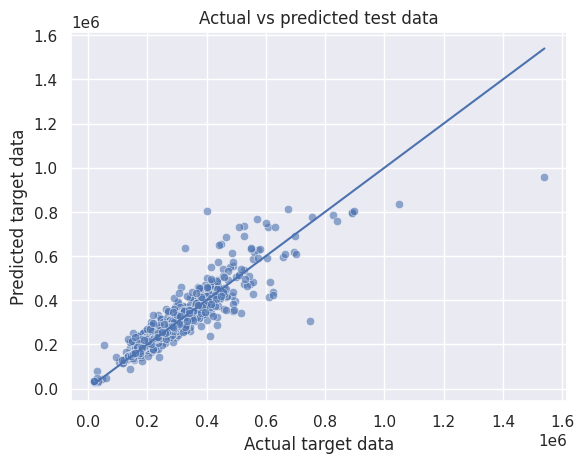

In [ ]:
sns.set_theme()

sns.scatterplot(x='y_true', y='y_pred', data=predictions_df, alpha=.6)
sns.lineplot(x='y_true', y='y_true', data=predictions_df)

plt.xlabel('Actual target data')
plt.ylabel('Predicted target data')
plt.title('Actual vs predicted test data')
plt.show()

## 4. Tuning hyperparameters

### 4.1. Gridsearch

In [ ]:
rfr_model_param_grid = {
    'n_estimators': [5, 10, 50, 100, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [3, 5, 8, 13, 21]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rfr_grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=44),
    param_grid=rfr_model_param_grid,
    refit=True,
    verbose=2,
    cv=5
)

In [ ]:
rfr_grid.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END .....max_depth=3, max_features=sqrt, n_estimators=5; total time=   0.1s
[CV] END .....max_depth=3, max_features=sqrt, n_estimators=5; total time=   0.1s
[CV] END .....max_depth=3, max_features=sqrt, n_estimators=5; total time=   0.1s
[CV] END .....max_depth=3, max_features=sqrt, n_estimators=5; total time=   0.1s
[CV] END .....max_depth=3, max_features=sqrt, n_estimators=5; total time=   0.1s
[CV] END ....max_depth=3, max_features=sqrt, n_estimators=10; total time=   0.1s
[CV] END ....max_depth=3, max_features=sqrt, n_estimators=10; total time=   0.1s
[CV] END ....max_depth=3, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=3, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=3, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=3, max_features=sqrt, n_estimators=50; total time=   0.2s
[CV] END ....max_depth=3, max_features=sqrt, n_

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=44),
             param_grid={'max_depth': [3, 5, 8, 13, 21],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [5, 10, 50, 100, 500]},
             verbose=2)

In [ ]:
pd.DataFrame(rfr_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.061127,0.012710,0.017033,0.008194,3,sqrt,5,"{'max_depth': 3, 'max_features': 'sqrt', 'n_es...",0.695076,0.587669,0.635728,0.595726,0.531826,0.609205,0.054241,49
1,0.062589,0.031469,0.005097,0.000437,3,sqrt,10,"{'max_depth': 3, 'max_features': 'sqrt', 'n_es...",0.745090,0.619160,0.666380,0.608970,0.552421,0.638404,0.064489,41
2,0.358487,0.190525,0.024398,0.010951,3,sqrt,50,"{'max_depth': 3, 'max_features': 'sqrt', 'n_es...",0.710415,0.626157,0.695754,0.611767,0.534845,0.635788,0.063284,43
3,0.823683,0.213812,0.023676,0.008059,3,sqrt,100,"{'max_depth': 3, 'max_features': 'sqrt', 'n_es...",0.707938,0.621539,0.690012,0.604528,0.528042,0.630412,0.064484,47
4,1.517079,0.681165,0.038710,0.015647,3,sqrt,500,"{'max_depth': 3, 'max_features': 'sqrt', 'n_es...",0.707434,0.625555,0.691306,0.606811,0.529942,0.632209,0.063717,45
5,0.013732,0.003212,0.003184,0.000792,3,log2,5,"{'max_depth': 3, 'max_features': 'log2', 'n_es...",0.695076,0.587669,0.635728,0.595726,0.531826,0.609205,0.054241,49
6,0.021680,0.002623,0.003352,0.000972,3,log2,10,"{'max_depth': 3, 'max_features': 'log2', 'n_es...",0.745090,0.619160,0.666380,0.608970,0.552421,0.638404,0.064489,41
7,0.089674,0.003703,0.004888,0.000075,3,log2,50,"{'max_depth': 3, 'max_features': 'log2', 'n_es...",0.710415,0.626157,0.695754,0.611767,0.534845,0.635788,0.063284,43
8,0.177933,0.006292,0.009467,0.002330,3,log2,100,"{'max_depth': 3, 'max_features': 'log2', 'n_es...",0.707938,0.621539,0.690012,0.604528,0.528042,0.630412,0.064484,47
9,1.188635,0.245525,0.036517,0.008483,3,log2,500,"{'max_depth': 3, 'max_features': 'log2', 'n_es...",0.707434,0.625555,0.691306,0.606811,0.529942,0.632209,0.063717,45


In [ ]:
rfr_grid.best_params_

{'max_depth': 21, 'max_features': 'sqrt', 'n_estimators': 500}

In [ ]:
rfr_grid.best_estimator_

RandomForestRegressor(max_depth=21, max_features='sqrt', n_estimators=500,
                      random_state=44)

In [ ]:
y_preds_tuned = rfr_grid.best_estimator_.predict(X_test)

In [ ]:
predictions_df['y_pred_tuned'] = y_preds_tuned

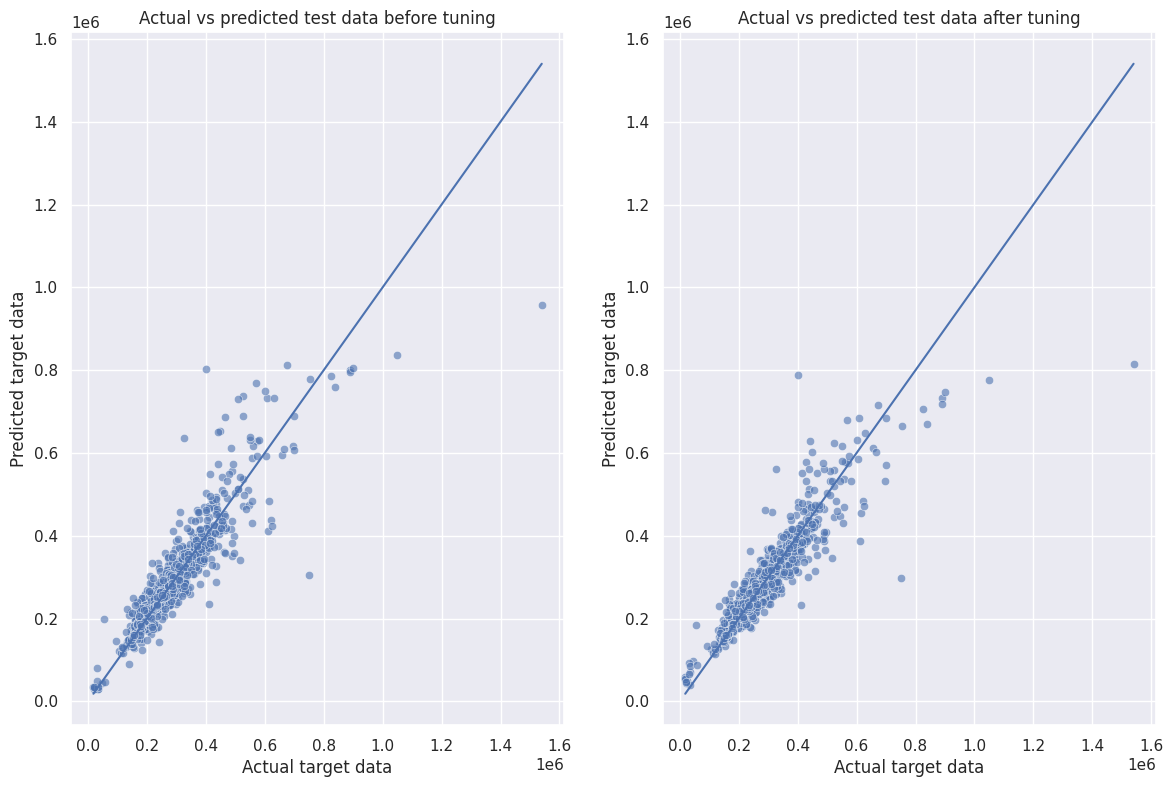

In [ ]:
sns.set_theme()

fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(14,9))

# Plot model's performance before tuning
sns.scatterplot(x='y_true', y='y_pred', data=predictions_df, alpha=.6, ax=ax1)
sns.lineplot(x='y_true', y='y_true', data=predictions_df, ax=ax1)

ax1.set_xlabel('Actual target data')
ax1.set_ylabel('Predicted target data')
ax1.set_title('Actual vs predicted test data before tuning')

# Plot model's performance after tuning
sns.scatterplot(x='y_true', y='y_pred_tuned', data=predictions_df, alpha=.6, ax=ax2)
sns.lineplot(x='y_true', y='y_true', data=predictions_df, ax=ax2)

ax2.set_xlabel('Actual target data')
ax2.set_ylabel('Predicted target data')
ax2.set_title('Actual vs predicted test data after tuning')


plt.show()

In [ ]:
model_1_metrics = rfr_metrics(y_test, y_preds_tuned, rfr_grid.best_estimator_, X_test)

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.DataFrame({
    'model_0': model_0_metrics,
    'model_1': model_1_metrics
})

,model_0,model_1
MAE,25675.66410,24267.68520
MSE,2158279871.50830,2084637244.09490
RMSE,46457.29080,45657.82790
R_squared,0.83280,0.83850


It's remarkable how little GridSearchCV hyperparameter tuning improved Random Forest Regressor's performance.

## 5. Using cross validation and Out-of-Bag observations to estimate $R^2$ in the test set.

### 5.1. Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
R_2 = cross_val_score(
    estimator = RandomForestRegressor(
        max_depth=21,
        max_features='sqrt',
        n_estimators=500
    ),
    X = X_train,
    y = y_train,
    cv=5,
    scoring='r2'
)

In [ ]:
R_2.mean()

0.7940415014692785

### 5.2. Out-of-Bag errors
We can show that on average the ensemble of bagged trees make use of around 2/3 of observations. 1/3 remain unknown for the model. These left observations are called out-of-bag (OOB) observations.

In [ ]:
# Set the seed
np.random.seed(44)

# Show whole random sample
np.random.choice(100, size=100)

array([88, 33, 95, 95, 22, 96, 56, 42, 88, 49, 92, 37, 29, 11, 99, 82, 84,
       73, 59, 73, 73, 57, 19, 64, 30, 16, 19, 77, 80, 88, 94, 77, 89, 63,
       36, 20, 45,  9, 50, 90, 14, 83, 34,  0, 27, 28,  5, 13,  6, 13, 65,
       11, 69, 79, 22,  5, 86, 20, 17, 38, 31, 16, 17, 93, 23, 97, 99, 80,
       36, 66, 78, 57, 88, 21, 83, 39, 98, 31, 57, 16, 48, 21, 40, 54, 86,
       80, 92,  4, 24,  0, 15, 75, 99,  8, 56, 21, 32, 12, 17, 62])

In [ ]:
# Count unique values from a random sample
np.unique(np.random.choice(100, size=100)).size

67

In [ ]:
RFR_oob = RandomForestRegressor(
    max_depth=21,
    max_features='sqrt',
    n_estimators=500,
    oob_score=True,
    random_state=44
)

In [ ]:
RFR_oob.fit(X_train, y_train)

RandomForestRegressor(max_depth=21, max_features='sqrt', n_estimators=500,
                      oob_score=True, random_state=44)

In [ ]:
RFR_oob.oob_score_

0.7924476977004997

## 6. Assess feature importance

In [ ]:
feature_names = X_train.columns

In [ ]:
print(feature_names)

Index(['DOM', 'Garage Capacity', 'HOA Fee', 'Irregular Shape', 'Quadrant',
       'School District', 'Sold Terms', 'Total Bedrooms', 'Total Bathrooms',
       'Total Square Feet', 'Year Built', 'Zip', 'year_sold', 'month_sold',
       'built_after_2000'],
      dtype='object')


In [ ]:
feature_importance = RFR_oob.feature_importances_

In [ ]:
feature_importance_df = pd.DataFrame({
    'feature_names': feature_names,
    'importance_vals': feature_importance
})

In [ ]:
feature_importance_df.sort_values(by='importance_vals', ascending=False)

,feature_names,importance_vals
9,Total Square Feet,0.36259
1,Garage Capacity,0.14799
8,Total Bathrooms,0.10971
7,Total Bedrooms,0.07765
10,Year Built,0.05369
0,DOM,0.04799
2,HOA Fee,0.04073
12,year_sold,0.02822
13,month_sold,0.02712
11,Zip,0.02490


In [ ]:
# Make the DF tidy
feature_importance_df = feature_importance_df.sort_values(by='importance_vals', ascending=False).set_index(keys='feature_names')

<Axes: xlabel='importance_vals', ylabel='feature_names'>

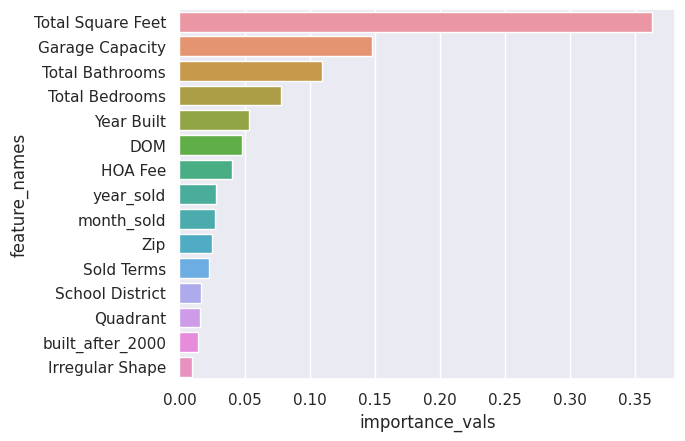

In [ ]:
sns.barplot(
  data=feature_importance_df,
  y=feature_importance_df.index,
  x='importance_vals'
)

### Research question: *Does more important feature mean more significant?*

In [ ]:
import statsmodels.api as sm

In [ ]:
# Add beta0 constant term for
X_test_bis = sm.add_constant(X_test)
X_train_bis = sm.add_constant(X_train)

In [ ]:
X_test_bis.head()

,const,DOM,Garage Capacity,HOA Fee,Irregular Shape,Quadrant,School District,Sold Terms,Total Bedrooms,Total Bathrooms,Total Square Feet,Year Built,Zip,year_sold,month_sold,built_after_2000
303,1.00000,5,2,35,0.00000,2.00000,0.00000,3.00000,5,3,2272,1999,3.00000,2019,4,0
1579,1.00000,21,2,18,1.00000,3.00000,1.00000,5.00000,4,3,2002,2019,5.00000,2019,6,1
2635,1.00000,81,2,0,0.00000,3.00000,0.00000,2.00000,4,3,1972,2009,5.00000,2019,3,1
728,1.00000,1,0,0,0.00000,3.00000,0.00000,4.00000,3,1,1222,1917,4.00000,2018,5,0
603,1.00000,67,2,110,0.00000,2.00000,0.00000,2.00000,3,3,1325,2009,3.00000,2019,10,1


In [ ]:
# Fit a regression model
regression_model = sm.OLS(y_train, X_train_bis)

statsmodels_regression = regression_model.fit()

In [ ]:
statsmodels_reg_summ = statsmodels_regression.summary()

In [ ]:
statsmodels_reg_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sold Price   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     613.8
Date:                Mon, 09 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:17:35   Log-Likelihood:                -35625.
No. Observations:                2875   AIC:                         7.128e+04
Df Residuals:                    2859   BIC:                         7.138e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -5.236e+07   2.71e+06    -19.313      0.000   -5.77e+07    -4.7e+07
DOM                  15.6742     22.156      0.707      0.479     -27.768      59.117
Garage Capacity    1.863e+04   1375.494     13.546      0.000    1.59e+04    2.13e+04
HOA Fee             -16.4152     18.595     -0.883      0.377     -52.876      20.045
Irregular Shape    8690.2347   3859.313      2.252      0.024    1122.917    1.63e+04
Quadrant           5697.7668   1035.489      5.502      0.000    3667.386    7728.148
School District   -2165.5655   2583.656     -0.838      0.402   -7231.584    2900.453
Sold Terms         -706.3811    964.129     -0.733      0.464   -2596.840    1184.078
Total Bedrooms      405.4741   1311.144      0.309      0.757   -2165.409    2976.357
Total Bathrooms    3593.2962   1947.761      1.845      0.065    -225.862    7412.455
Total Square Feet    83.0602      1.745     47.588      0.000      79.638      86.483
Year Built         -103.4668     55.547     -1.863      0.063    -212.384       5.450
Zip                 385.9081    267.137      1.445      0.149    -137.893     909.710
year_sold          2.603e+04   1341.744     19.403      0.000    2.34e+04    2.87e+04
month_sold         3079.9207    362.235      8.503      0.000    2369.652    3790.189
built_after_2000   2.051e+04   3282.661      6.247      0.000    1.41e+04    2.69e+04
==============================================================================
Omnibus:                     3610.499   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1447542.472
Skew:                           6.363   Prob(JB):                         0.00
Kurtosis:                     112.187   Cond. No.                     9.35e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
statsmodels_regression.pvalues[1:]

DOM                 0.47934
Garage Capacity     0.00000
HOA Fee             0.37743
Irregular Shape     0.02441
Quadrant            0.00000
School District     0.40200
Sold Terms          0.46382
Total Bedrooms      0.75715
Total Bathrooms     0.06517
Total Square Feet   0.00000
Year Built          0.06261
Zip                 0.14868
year_sold           0.00000
month_sold          0.00000
built_after_2000    0.00000
dtype: float64

In [ ]:
statsmodels_regression.tvalues[1:]

DOM                  0.70746
Garage Capacity     13.54593
HOA Fee             -0.88279
Irregular Shape      2.25176
Quadrant             5.50249
School District     -0.83818
Sold Terms          -0.73266
Total Bedrooms       0.30925
Total Bathrooms      1.84483
Total Square Feet   47.58771
Year Built          -1.86268
Zip                  1.44461
year_sold           19.40252
month_sold           8.50254
built_after_2000     6.24742
dtype: float64

In [ ]:
rq_1_df =  pd.concat(
    [
        feature_importance_df,
        statsmodels_regression.tvalues[1:].rename('t_values'),
        statsmodels_regression.pvalues[1:].rename('p_values'),
    ],
    axis=1
)

In [ ]:
# Show reasearch question DF
rq_1_df

,importance_vals,t_values,p_values
Total Square Feet,0.36259,47.58771,0.00000
Garage Capacity,0.14799,13.54593,0.00000
Total Bathrooms,0.10971,1.84483,0.06517
Total Bedrooms,0.07765,0.30925,0.75715
Year Built,0.05369,-1.86268,0.06261
DOM,0.04799,0.70746,0.47934
HOA Fee,0.04073,-0.88279,0.37743
year_sold,0.02822,19.40252,0.00000
month_sold,0.02712,8.50254,0.00000
Zip,0.02490,1.44461,0.14868


In [ ]:
rq_1_df['t_values'][rq_1_df['p_values']<0.05]

Total Square Feet   47.58771
Garage Capacity     13.54593
year_sold           19.40252
month_sold           8.50254
Quadrant             5.50249
built_after_2000     6.24742
Irregular Shape      2.25176
Name: t_values, dtype: float64

In [ ]:
round(rq_1_df['t_values'][rq_1_df['p_values']<0.05], 4)

TypeError: ignored

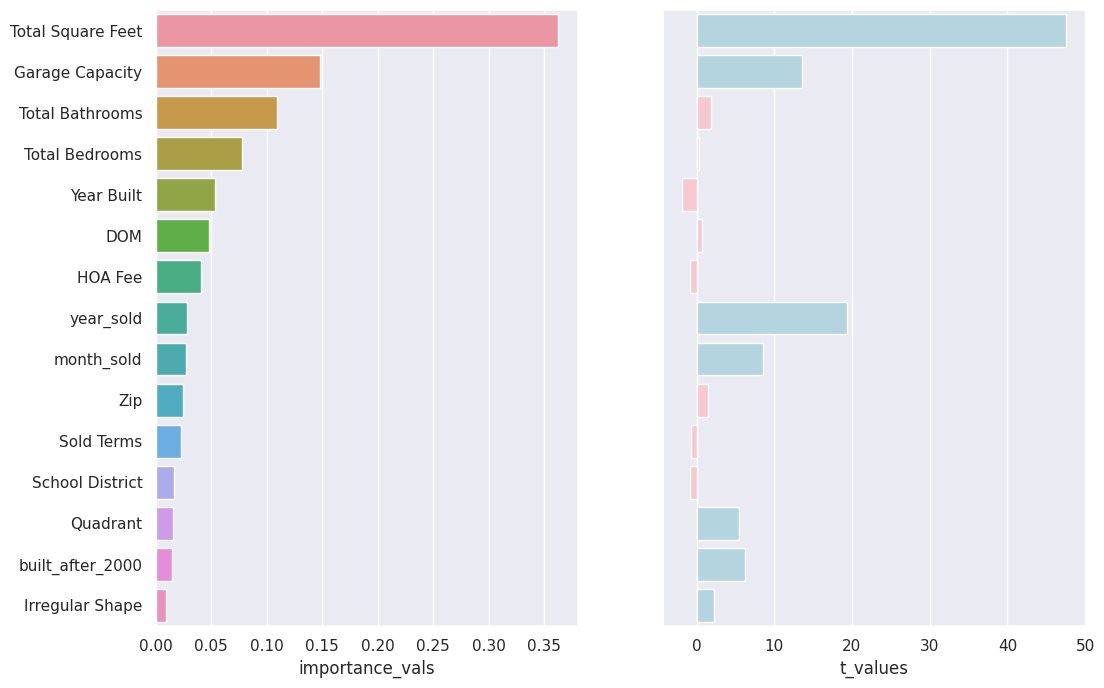

In [ ]:
# Visualize research question answer
fig, (ax1, ax2) = plt.subplots(figsize=(12,8), ncols=2)
sns.barplot(
    ax=ax1,
    data=rq_1_df,
    x='importance_vals',
    y=rq_1_df.index
)

sns.barplot(
    ax=ax2,
    x=round(rq_1_df['t_values'], 4),
    y=rq_1_df.index,
    palette=['lightblue' if x < 0.05 else 'pink' for x in rq_1_df['p_values']]
)

ax2.set_yticks([])

plt.show()

Here we see that polynomial linear model misses the importance of 'Toral Bathrooms' and 'Total Bedrooms'.

This means that the relation between features and the target is non-linear...

For later study:

* https://www.blog.trainindata.com/mutual-information-with-python/
* https://stats.stackexchange.com/questions/401952/how-does-feature-selection-work-for-non-linear-models